## **Chapter 5: Getting Started with pandas**

- **pandas** là một thư viện mạnh trong Python dùng để làm sạch, xử lý và phân tích dữ liệu một cách nhanh chóng và tiện lợi.
- Thường được dùng cùng với các thư viện như:
    - matplotlib (vẽ biểu đồ),
    - scikit-learn, statsmodels (phân tích, học máy).
    - pandas được phát triển từ năm 2010 và đến nay đã có hơn 2.500 người đóng góp, là một dự án cộng đồng mã nguồn mở từ năm 2013.
- Trong sách, tác giả dùng quy ước import chuẩn:

In [55]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

- Series: dữ liệu 1 chiều (giống 1 cột).
- DataFrame: dữ liệu 2 chiều (giống bảng).

### **5.1 Introduction to pandas Data Structures**

#### **Series**

Series là một mảng 1 chiều trong pandas, giống NumPy array nhưng có thêm **nhãn (index)** cho từng phần tử.

In [56]:
obj = pd.Series([4, 7, -5, 3])
print(obj)

0    4
1    7
2   -5
3    3
dtype: int64


📌 Nếu không chỉ định index, pandas sẽ tạo index mặc định là 0, 1, 2,…

Bạn có thể truy cập:

In [57]:
obj.array   # dữ liệu

<NumpyExtensionArray>
[4, 7, -5, 3]
Length: 4, dtype: int64

In [58]:
obj.index   # index

RangeIndex(start=0, stop=4, step=1)

**Series có nhãn tùy chỉnh**

In [59]:
obj2 = pd.Series([4, 7, -5, 3], index=["a", "b", "c", "d"])  # Gán index tùy ý
obj2

a    4
b    7
c   -5
d    3
dtype: int64

👉 Truy cập theo nhãn:

In [60]:
obj2["a"]     # -5
obj2[["c", "a", "d"]]

c   -5
a    4
d    3
dtype: int64

**Series hỗ trợ các thao tác như NumPy**

In [61]:
obj2[obj2 > 0]     # lọc

a    4
b    7
d    3
dtype: int64

In [62]:
obj2 * 2           # nhân

a     8
b    14
c   -10
d     6
dtype: int64

In [63]:
np.exp(obj2)       # dùng hàm numpy

a      54.598150
b    1096.633158
c       0.006738
d      20.085537
dtype: float64

**Series giống từ điển**

In [64]:
"b" in obj2

True

In [65]:
"e" in obj2 

False

Bạn có thể tạo Series từ dict:

In [66]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Hoặc ép index theo thứ tự mong muốn:

In [67]:
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Nếu key không tồn tại, giá trị sẽ là NaN.

**Kiểm tra giá trị thiếu (NaN)**

In [68]:
pd.isna(obj4)
obj4.notna()      # cũng được

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

**Cộng Series – tự động căn chỉnh theo index**

In [69]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

📌 Các nhãn được ghép giống như phép **join** trong cơ sở dữ liệu.

**Đặt tên cho Series và index**

In [70]:
obj4.name = "population"
obj4.index.name = "state"
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

**Thay đổi index**

In [71]:
obj.index = ["Bob", "Steve", "Jeff", "Ryan"]
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

#### **DataFrame**

##### **🧱 DataFrame là gì?**
- Là một bảng dữ liệu hai chiều (giống như bảng Excel).
- Mỗi **cột** là một **Series**, và các Series này **dùng chung chỉ mục (index)**.
- Có thể chứa nhiều kiểu dữ liệu khác nhau trong từng cột (số, chuỗi, Boolean…).

##### **🛠 Cách tạo DataFrame phổ biến nhất**

In [73]:
data = {
    "state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
    "year": [2000, 2001, 2002, 2001, 2002, 2003],
    "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


##### **📋 Truy cập dữ liệu**

- Truy cập **cột**:

In [74]:
frame["state"]
frame.year  # Chỉ dùng được nếu tên cột là tên hợp lệ trong Python

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

- Truy cập **dòng**:

In [76]:
frame.loc[1]   # Theo label

state    Ohio
year     2001
pop       1.7
Name: 1, dtype: object

In [77]:
frame.iloc[2]  # Theo vị trí

state    Ohio
year     2002
pop       3.6
Name: 2, dtype: object

##### **🪄 Tùy chỉnh và thao tác với cột**

- **Thêm cột mới:**

In [78]:
frame["debt"] = 16.5        # Gán 1 giá trị duy nhất cho toàn bộ cột
frame

,state,year,pop,debt
0,Ohio,2000,1.5,16.5
1,Ohio,2001,1.7,16.5
2,Ohio,2002,3.6,16.5
3,Nevada,2001,2.4,16.5
4,Nevada,2002,2.9,16.5
5,Nevada,2003,3.2,16.5


In [79]:
frame["debt"] = np.arange(6.)  # Gán mảng có cùng độ dài
frame

,state,year,pop,debt
0,Ohio,2000,1.5,0.0
1,Ohio,2001,1.7,1.0
2,Ohio,2002,3.6,2.0
3,Nevada,2001,2.4,3.0
4,Nevada,2002,2.9,4.0
5,Nevada,2003,3.2,5.0


- **Gán Series có chỉ mục riêng** (sẽ được căn chỉnh theo index của DataFrame):

In [81]:
val = pd.Series([-1.2, -1.5, -1.7], index=["two", "four", "five"])
frame["debt"] = val
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

- **Xóa cột**:

In [82]:
del frame["debt"]

##### **🔄 Chuyển đổi dữ liệu**

- **Chuyển đổi từ dictionary lồng nhau**:

In [83]:
populations = {
    "Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6},
    "Nevada": {2001: 2.4, 2002: 2.9}
}
frame3 = pd.DataFrame(populations)
frame3

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


- **Chuyển vị (transpose)**:

In [84]:
frame3.T

,2000,2001,2002
Ohio,1.5,1.7,3.6
Nevada,NaN,2.4,2.9


- **Chỉ định index cụ thể khi tạo từ nested dict**:

In [85]:
pd.DataFrame(populations, index=[2001, 2002, 2003])

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9
2003,NaN,NaN


##### **🔎 Một số điểm cần lưu ý**
- frame[col] trả về một **view**, không phải **copy**.
- Dot notation (frame.year) không dùng được nếu tên cột có dấu cách hoặc ký tự đặc biệt.
- Nếu gán giá trị với độ dài không khớp số dòng, sẽ báo lỗi.
- Dùng `frame.head()` để xem 5 dòng đầu, `frame.tail()` để xem 5 dòng cuối.

#### **Index Objects**

Trong pandas, **Index** là đối tượng lưu trữ **nhãn trục (axis labels)** – ví dụ như tên cột của DataFrame hoặc chỉ số dòng của Series. Khi bạn tạo một Series hoặc DataFrame với danh sách nhãn, pandas sẽ tự động chuyển chúng thành Index.

In [87]:
obj = pd.Series(np.arange(3), index=["a", "b", "c"])
index = obj.index
print(index)           # Index(['a', 'b', 'c'], dtype='object')
print(index[1:])       # Index(['b', 'c'], dtype='object')

Index(['a', 'b', 'c'], dtype='object')
Index(['b', 'c'], dtype='object')


##### **🧊 Tính bất biến (Immutable)**

Index **không thể thay đổi** sau khi được tạo:

In [88]:
index[1] = "d"  # ❌ Gây lỗi: TypeError

TypeError: Index does not support mutable operations

Điều này giúp bạn **chia sẻ Index giữa các cấu trúc dữ liệu** một cách an toàn:

In [89]:
labels = pd.Index(np.arange(3))
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print(obj2.index is labels)  # ✅ True

True


##### **🔍 Index hoạt động giống như tập hợp (set)**

Bạn có thể tra cứu:

In [90]:
print("Ohio" in frame3.columns)  # ✅ True
print(2003 in frame3.index)      # ❌ False

True
False


Tuy nhiên, khác với set, Index **cho phép nhãn trùng lặp**:

In [91]:
pd.Index(["foo", "foo", "bar", "bar"])
# Index(['foo', 'foo', 'bar', 'bar'])

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Nếu bạn truy xuất theo nhãn trùng, pandas sẽ trả về **tất cả các mục khớp**.

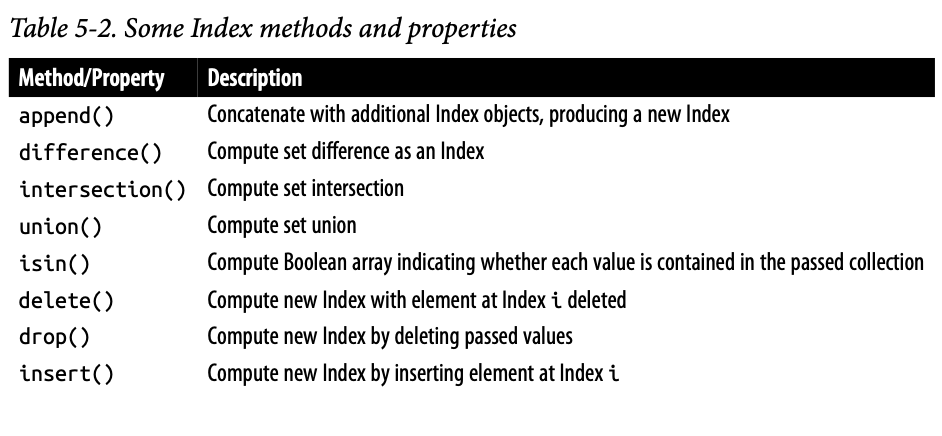
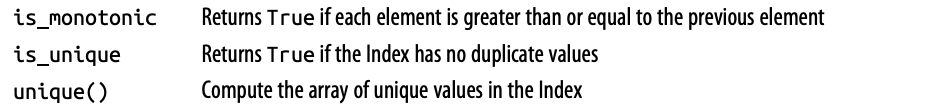

### **5.2 Essential Functionality**

**Phần này sẽ hướng dẫn bạn những thao tác cơ bản với dữ liệu trong Series và DataFrame.**

Trong các chương tiếp theo, chúng ta sẽ đi sâu vào các chủ đề về **phân tích và xử lý dữ liệu** bằng pandas.

**📚 Lưu ý:**
Cuốn sách này **không nhằm mục đích cung cấp tài liệu toàn diện** về thư viện pandas. Thay vào đó, mục tiêu là giúp bạn l**àm quen với những tính năng được sử dụng thường xuyên nhất**.
Những tính năng ít gặp hoặc nâng cao hơn (còn gọi là **esoteric**) bạn có thể tự khám phá thêm qua **tài liệu chính thức của pandas trên mạng**.

#### **Reindexing**

**Reindexing** là thao tác tạo ra một đối tượng pandas mới, với dữ liệu được sắp xếp lại hoặc mở rộng/thu hẹp theo chỉ số (index) hoặc tên cột (columns) mới.
- Nếu index/cột mới có nhãn chưa từng xuất hiện, pandas sẽ tự động chèn giá trị thiếu (NaN).
- Có thể áp dụng cho cả Series và DataFrame.

In [92]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
print(obj)

obj2 = obj.reindex(["a", "b", "c", "d", "e"])
print(obj2)


d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64


- Dữ liệu được sắp xếp lại theo thứ tự index mới.

- "e" không có dữ liệu nên trả về NaN.

**Điền giá trị khi reindex (fill)**

Khi reindex với dữ liệu có thứ tự (như chuỗi thời gian), bạn có thể dùng các phương pháp điền giá trị bị thiếu:
- `ffill`: Điền tiến (lấy giá trị trước đó).
- `bfill`: Điền lùi (lấy giá trị sau đó).

In [93]:
obj3 = pd.Series(["blue", "purple", "yellow"], index=[0, 2, 4])
obj3_reindexed = obj3.reindex(range(6), method="ffill")
print(obj3_reindexed)


0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object


- Các giá trị bị thiếu sẽ được điền bằng giá trị gần nhất phía trước.

**Reindex với DataFrame**

Có thể reindex theo hàng (index), cột (columns), hoặc cả hai.

In [94]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=["a", "c", "d"],
                     columns=["Ohio", "Texas", "California"])

frame2 = frame.reindex(index=["a", "b", "c", "d"])
print(frame2)

   Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0


- Hàng "b" không có dữ liệu nên toàn bộ là NaN.

Reindex cột:

In [95]:
states = ["Texas", "Utah", "California"]
frame3 = frame.reindex(columns=states)
print(frame3)

   Texas  Utah  California
a      1   NaN           2
c      4   NaN           5
d      7   NaN           8


- Cột "Utah" không có dữ liệu nên là NaN.
- Cột "Ohio" bị loại bỏ.

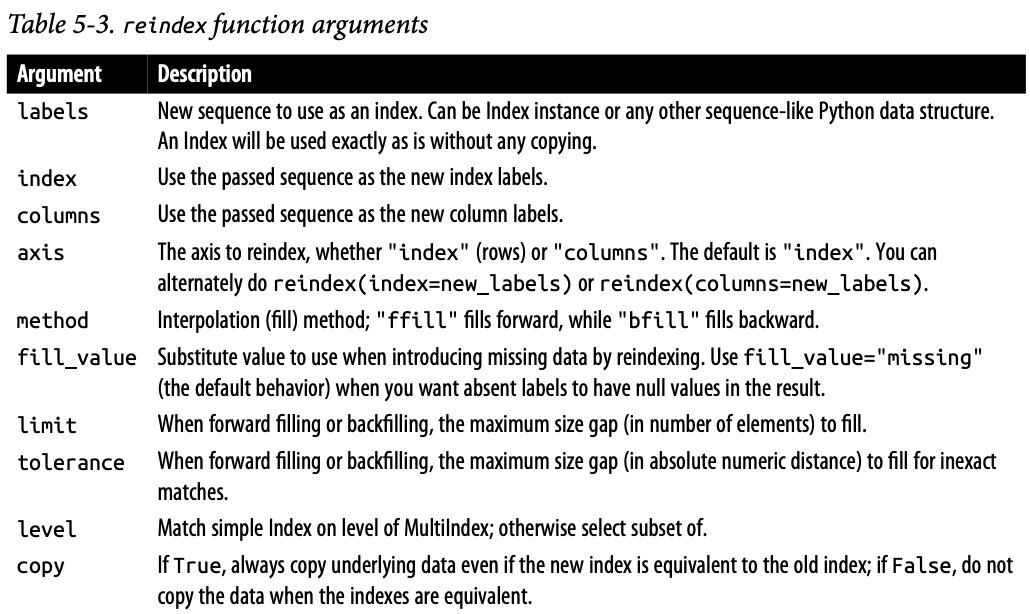

**💡 Lưu ý**
- Dùng `.loc` để chọn lại index/cột chỉ được nếu nhãn đã tồn tại (không tự động thêm NaN như reindex).
- Reindex cực kỳ hữu ích khi cần chuẩn hóa dữ liệu đầu vào, ghép nối hoặc trực quan hóa.

#### **Dropping Entries from an Axis**

- **Dropping** là thao tác **xóa một hoặc nhiều phần tử** (entries) khỏi một trục (axis) của Series hoặc DataFrame.

- Có thể xóa theo **hàng** (index) hoặc **cột** (columns).

- Sử dụng phương thức `.drop()` để thực hiện nhanh chóng, trả về **đối tượng mới** (không thay đổi dữ liệu gốc).



##### **🔎 Xóa phần tử trong Series**

In [96]:
obj = pd.Series(np.arange(5.), index=["a", "b", "c", "d", "e"])
print(obj)

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64


**✨ Xóa một phần tử:**

In [97]:
new_obj = obj.drop("c")
print(new_obj)

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64


**✨ Xóa nhiều phần tử cùng lúc:**

In [98]:
obj2 = obj.drop(["d", "c"])
print(obj2)

a    0.0
b    1.0
e    4.0
dtype: float64


**📝 Ghi chú:**

`.drop()` không làm thay đổi Series gốc, mà trả về một Series mới đã loại bỏ các phần tử chỉ định.

##### **📊 Xóa dữ liệu trong DataFrame**

Tương tự, bạn có thể xóa hàng hoặc cột trong DataFrame bằng `.drop()`:

In [100]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


**✨ Xóa hàng (theo index):**

In [101]:
data2 = data.drop(index=["Colorado", "Ohio"])
print(data2)

          one  two  three  four
Utah        8    9     10    11
New York   12   13     14    15


**✨ Xóa cột (theo columns):**

In [102]:
data3 = data.drop(columns=["two"])
print(data3)

          one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15


**✨ Cách khác để xóa cột (dùng axis):**

In [103]:
data4 = data.drop("two", axis=1)
print(data4)

          one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15


Hoặc xóa nhiều cột:

In [104]:
data5 = data.drop(["two", "four"], axis="columns")
print(data5)

          one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
New York   12     14


##### **⚙️ Tóm tắt các tham số quan trọng của `.drop()`**

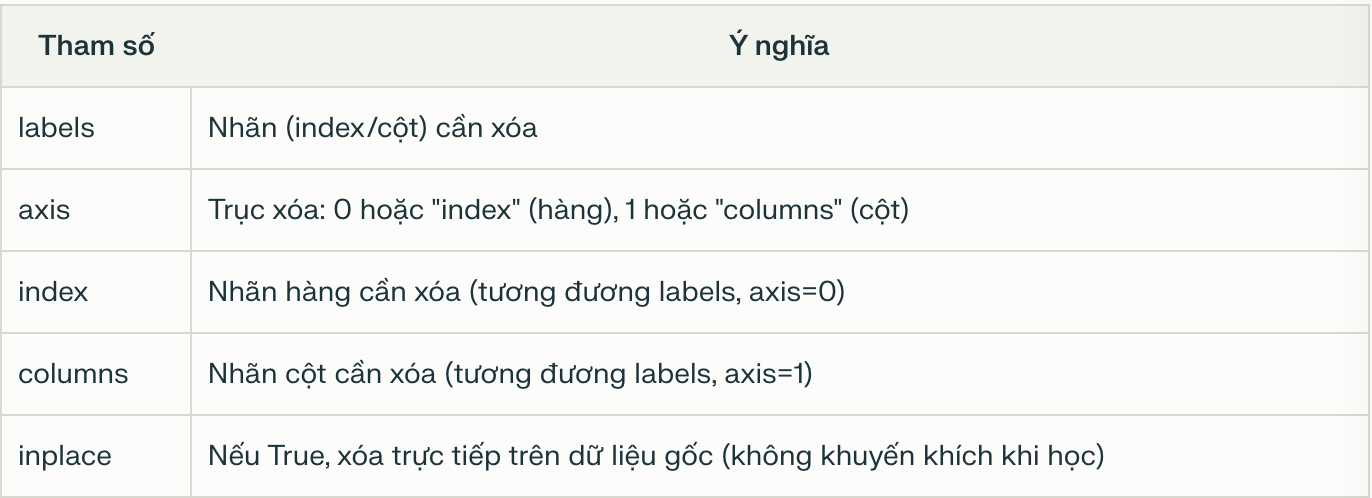

**💡 Lưu ý**
- `.drop()` luôn trả về đối tượng mới trừ khi đặt inplace=True.
- Nếu xóa nhãn không tồn tại, pandas sẽ báo lỗi (có thể dùng errors='ignore' để bỏ qua lỗi này).